### Exploratory Data Analysis on GoodReads Books Dataset

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [200]:
#load data
df = pd.read_csv('/Users/grv/Documents/GitHub/Books/books.csv',error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [201]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [202]:
df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [176]:
#Total number of unique authors
authors = df['authors'].unique()
len(authors)

7600

In [177]:
#Setting BookID as index
df.set_index("bookID",inplace=True)

In [178]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [179]:
df.corr()

,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.000453,0.167388,0.041234,0.036695
isbn13,0.000453,1.000000,-0.011723,0.004835,0.007260
# num_pages,0.167388,-0.011723,1.000000,0.028408,0.034171
ratings_count,0.041234,0.004835,0.028408,1.000000,0.863467
text_reviews_count,0.036695,0.007260,0.034171,0.863467,1.000000


In [180]:
data = df.copy()

In [181]:
#change "# num_pages" to "num_pages"
data.rename(columns = {'# num_pages': 'num_pages'}, inplace=True)

In [182]:
#remove books witn less than 50 reviews
data = data[data['ratings_count'] > 50]

In [183]:
#dropping duplicates
data=data.drop_duplicates(subset=['average_rating','num_pages','authors'])

In [185]:
#remove second authors
data['authors'] = data['authors'].apply(lambda x: x.split("-")[0])

In [186]:
len(data['authors'].unique())

3657

In [187]:
#most used language
top_language = data.groupby('language_code')['title'].count()

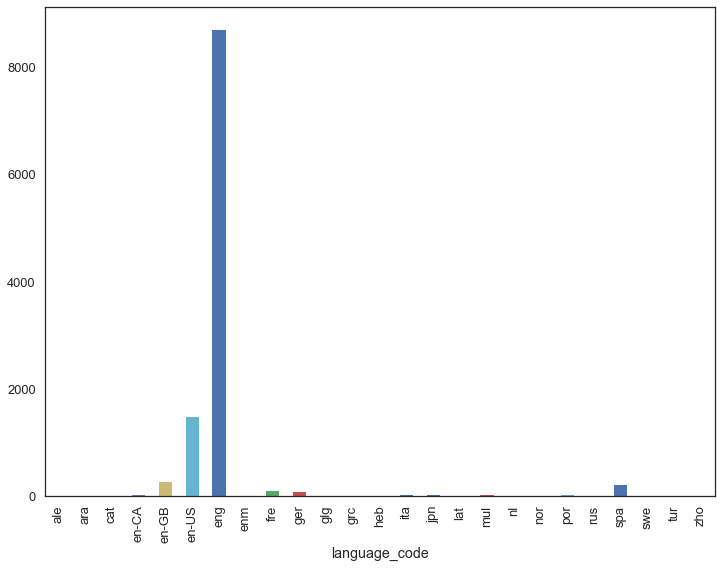

In [188]:
plt.figure(figsize=(12,9))
top_language.plot.bar()

Text(0.5,1,'The top 15 books by ratings count \n')

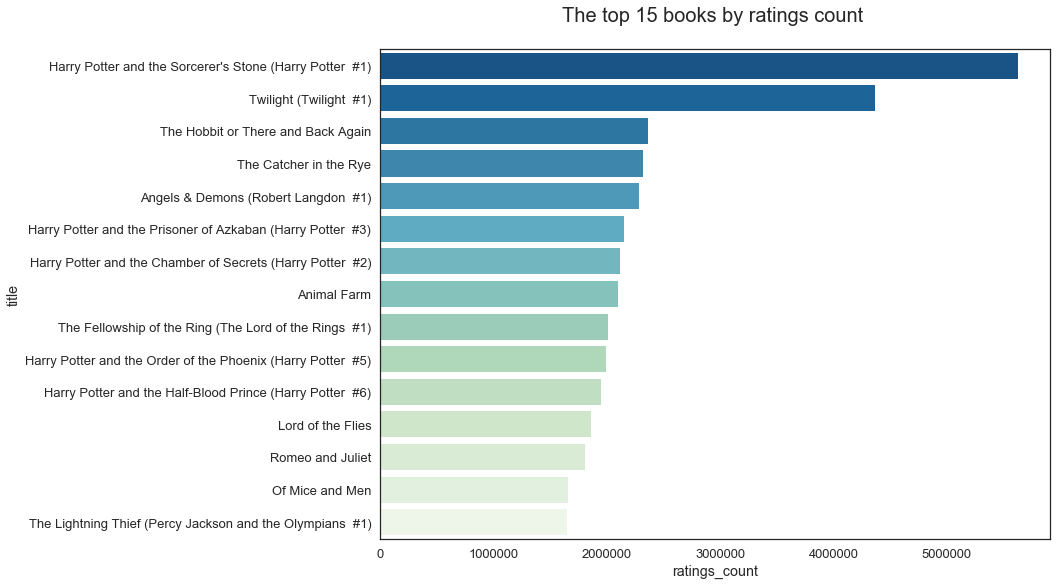

In [189]:
#Most rated books
most_rated = data.sort_values('ratings_count', ascending = False).head(15).set_index('title')
plt.figure(figsize=(12,9))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='GnBu_r')
plt.title('The top 15 books by ratings count \n', fontsize=20)

In [190]:
#top books by average ratings
top_avg_rating = data.sort_values('average_rating', ascending = False).head(15)

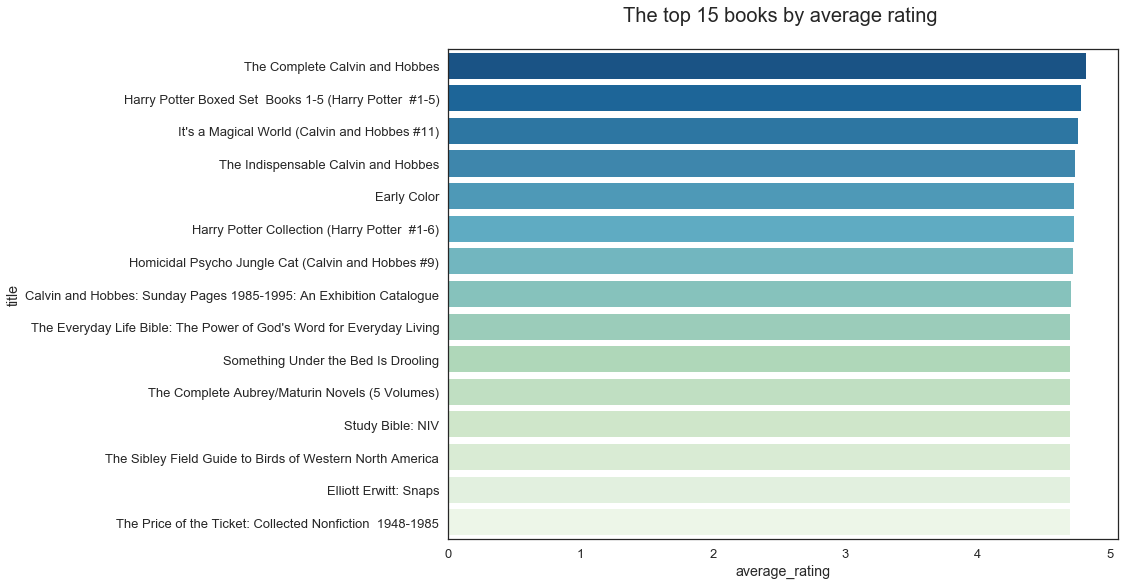

In [191]:
sns.set(style="white", context="talk")
fig = plt.figure(figsize=(12,9))
x = top_avg_rating['average_rating']
y = top_avg_rating['title']
sns.barplot(x=x, y=y, palette="GnBu_r")
plt.title('The top 15 books by average rating \n', fontsize=20)
plt.show();


In [192]:
#Top 15 books by average rating and maximum reviews
top_avg_rating_max = data[data["average_rating"] >= 4].sort_values("ratings_count", ascending=False).head(15)

In [193]:
top_avg_rating_max = top_avg_rating_max.sort_values('average_rating', ascending = False)

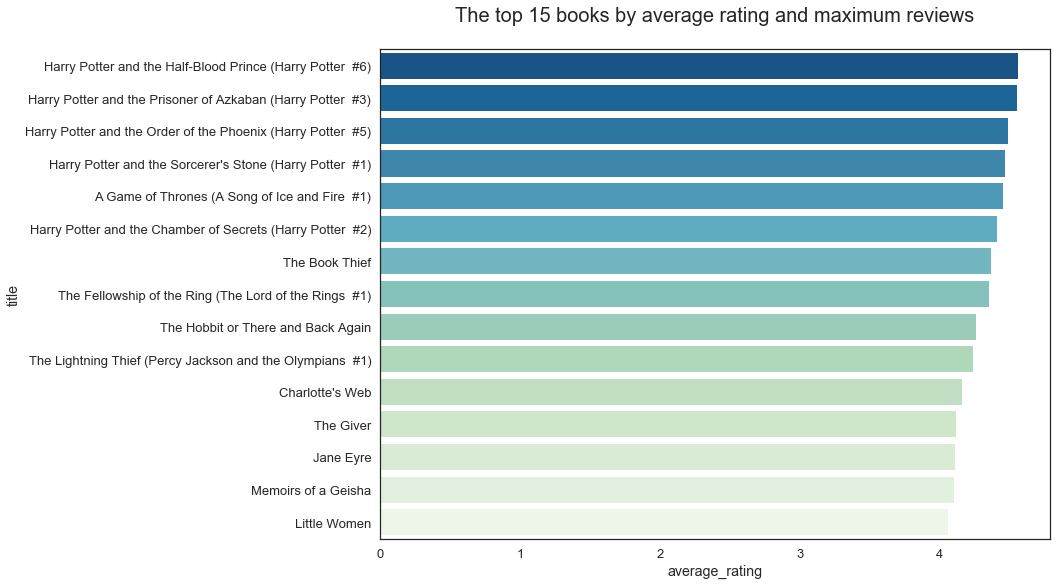

In [194]:
sns.set(style="white", context="talk")
fig = plt.figure(figsize=(12,9))
x = top_avg_rating_max['average_rating']
y = top_avg_rating_max['title']
sns.barplot(x=x, y=y, palette="GnBu_r")
plt.title('The top 15 books by average rating and maximum reviews\n', fontsize=20)
plt.show();


In [195]:
#The top 15 most text reviewed books
top_text_reviews = data.sort_values('text_reviews_count', ascending=False)[:15]
top_text_reviews.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,498,4367341,93619
19063,The Book Thief,Markus Zusak,4.37,0375831002,9780375831003,eng,552,1410666,84237
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,0439554934,9780439554930,eng,320,5629932,70390
865,The Alchemist,Paulo Coelho,3.85,0061122416,9780061122415,eng,197,1592632,54668
3636,The Giver,Lois Lowry,4.12,0385732554,9780385732550,eng,208,1464909,54469


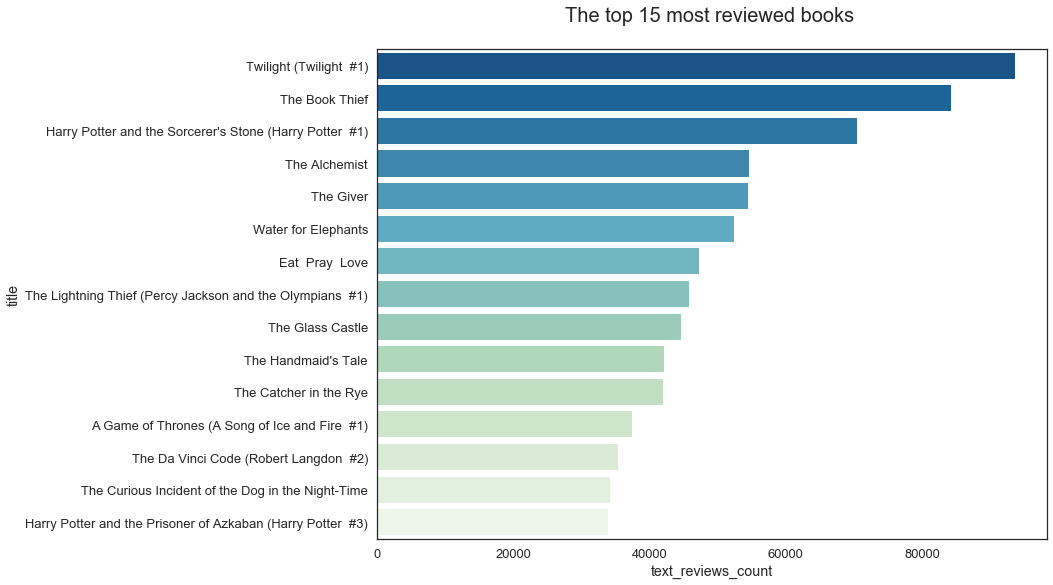

In [196]:
sns.set(style="white", context="talk")
fig = plt.figure(figsize=(12,9))
x = top_text_reviews['text_reviews_count']
y = top_text_reviews['title']
sns.barplot(x=x, y=y, palette="GnBu_r")
plt.title('The top 15 most reviewed books \n', fontsize=20)

plt.show();

Text(0.5,0,'Average rating')

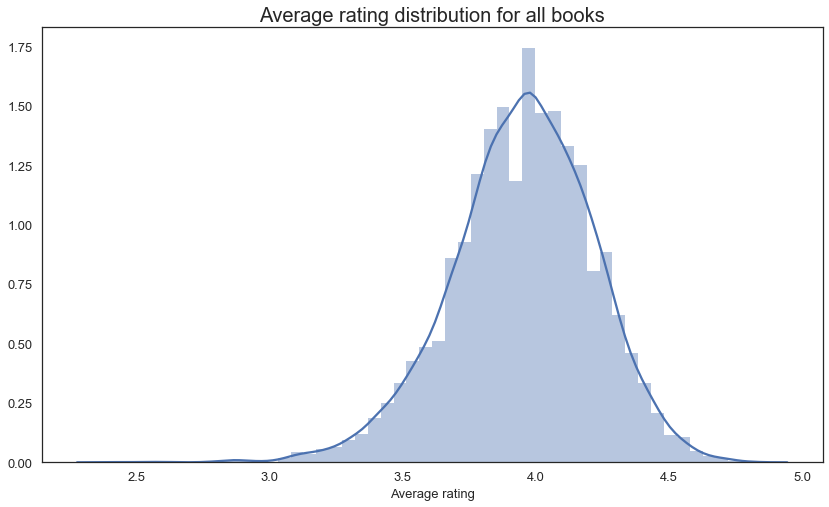

In [197]:
#Average rating distribution for all books
data.average_rating = data.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(data['average_rating'],ax=ax )
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

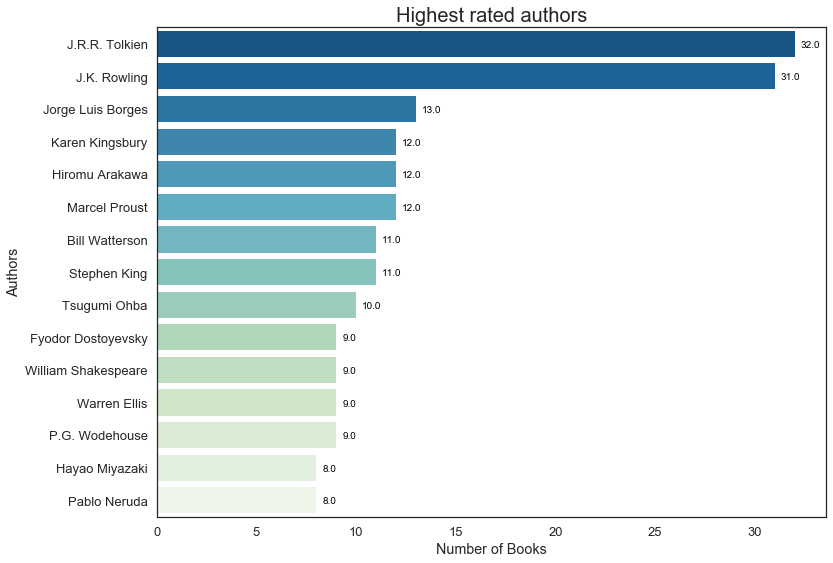

In [198]:
#top 15 Highest rated authors
high_rated_author = data[data['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(15).set_index('authors')
plt.figure(figsize=(12,9))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='GnBu_r')
ax.set_title('Highest rated authors',fontsize=20)
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')